In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 20)})

In [2]:
X_true = pd.read_csv('../input/marketing-strategy-personalised-offer/test_data.csv')
X_true.shape

(5305, 30)

In [3]:
#y_test = pd.read_csv('../input/marketing-strategy-personalised-offer/sample.csv')
#y_test.shape

In [4]:
train_data = pd.read_csv('../input/marketing-strategy-personalised-offer/train_data.csv')
train_data.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,2days,₹100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,...,0,0,4,67,less1,22,Spring,Location B,0,No
1,2days,₹87500 - ₹99999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,...,0,1,3,89,1~3,18,Summer,Location B,0,Yes
2,2days,₹87500 - ₹99999,less1,1,1~3,Single,Cold drinks,26,1,0,...,1,1,4,67,less1,7,Winter,Location A,1,Yes
3,10hours,₹37500 - ₹49999,less1,0,1~3,Single,Take-away restaurant,46,1,0,...,0,1,3,89,1~3,7,Summer,Location C,0,No
4,2days,₹100000 or More,never,1,1~3,Single,4 star restaurant,21,0,1,...,1,0,3,40,less1,7,Summer,Location C,0,No


In [5]:
train_data.shape

(12379, 31)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      12379 non-null  object
 1   income_range                          12379 non-null  object
 2   no_visited_Cold drinks                12181 non-null  object
 3   travelled_more_than_15mins_for_offer  12379 non-null  int64 
 4   Restaur_spend_less_than20             12258 non-null  object
 5   Marital Status                        12379 non-null  object
 6   restaurant type                       12379 non-null  object
 7   age                                   12379 non-null  object
 8   Prefer western over chinese           12379 non-null  int64 
 9   travelled_more_than_25mins_for_offer  12379 non-null  int64 
 10  travelled_more_than_5mins_for_offer   12379 non-null  int64 
 11  no_visited_bars             

In [7]:
train_data.isnull().sum()

offer expiration                            0
income_range                                0
no_visited_Cold drinks                    198
travelled_more_than_15mins_for_offer        0
Restaur_spend_less_than20                 121
Marital Status                              0
restaurant type                             0
age                                         0
Prefer western over chinese                 0
travelled_more_than_25mins_for_offer        0
travelled_more_than_5mins_for_offer         0
no_visited_bars                            93
gender                                      0
car                                     12268
restuarant_same_direction_house             0
Cooks regularly                             0
Customer type                               0
Qualification                               0
is foodie                                   0
no_Take-aways                             144
Job/Job Industry                            0
restuarant_opposite_direction_hous

In [8]:
train_data[train_data['car'].notnull()]['Offer Accepted'].value_counts(),train_data['Offer Accepted'].value_counts()

(Yes    61
 No     50
 Name: Offer Accepted, dtype: int64,
 Yes    6994
 No     5385
 Name: Offer Accepted, dtype: int64)

In [9]:
train_data[['restuarant_same_direction_house','restuarant_opposite_direction_house']].value_counts()

restuarant_same_direction_house  restuarant_opposite_direction_house
0                                1                                      9345
1                                0                                      2240
                                 1                                       402
0                                0                                       392
dtype: int64

In [10]:
train_data['travelled_more_than_5mins_for_offer'].unique()

array([1])

In [11]:
y_train_all = train_data.pop('Offer Accepted')
X_train_all = train_data

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [13]:
all_col = list(set(X_train_all.columns)-set(["car","restuarant_opposite_direction_house","travelled_more_than_5mins_for_offer"]))

In [14]:
le = LabelEncoder()
y_train_full = le.fit_transform(y_train_all)
#y_test = le.transform(y_test['Offer Accepted'])

In [15]:
#missing values and unnecessary stuff
transformer1 = ColumnTransformer(
    [
        ("drop_cols", "drop", ["car","restuarant_opposite_direction_house","travelled_more_than_5mins_for_offer"]),
        ("imputer", SimpleImputer(strategy="most_frequent"), all_col)
    ],
    remainder="passthrough"
)

In [16]:
pipeline = Pipeline(
    steps=[('replacing',transformer1),
           ('encoding', OrdinalEncoder())
          ]
)

In [17]:
X_train_full = pd.DataFrame(pipeline.fit_transform(X_train_all), columns=all_col)
X_train_full.head()

,travelled_more_than_25mins_for_offer,restuarant_same_direction_house,restaurant type,no_Take-aways,Cooks regularly,is foodie,Customer type,no_visited_Cold drinks,Marital Status,temperature,...,income_range,Qualification,has Children,offer expiration,travelled_more_than_15mins_for_offer,Travel Time,Prefer home food,age,gender,Climate
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,4.0,0.0,3.0,0.0,0.0
1,0.0,1.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,...,8.0,1.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,1.0
2,0.0,1.0,2.0,0.0,0.0,1.0,0.0,3.0,2.0,1.0,...,8.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0
3,0.0,1.0,4.0,0.0,0.0,1.0,0.0,3.0,2.0,2.0,...,4.0,5.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0
4,1.0,0.0,1.0,2.0,0.0,1.0,0.0,4.0,2.0,0.0,...,1.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [18]:
X_true = pd.DataFrame(pipeline.transform(X_true), columns=all_col)
X_true.head()

,travelled_more_than_25mins_for_offer,restuarant_same_direction_house,restaurant type,no_Take-aways,Cooks regularly,is foodie,Customer type,no_visited_Cold drinks,Marital Status,temperature,...,income_range,Qualification,has Children,offer expiration,travelled_more_than_15mins_for_offer,Travel Time,Prefer home food,age,gender,Climate
0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,2.0,1.0,1.0,1.0,0.0,0.0,6.0,1.0,1.0
1,0.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,3.0,1.0,...,3.0,5.0,1.0,0.0,0.0,3.0,1.0,0.0,1.0,1.0
2,0.0,0.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,1.0,...,1.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,3.0,1.0,0.0,1.0,0.0,4.0,1.0,0.0,...,3.0,5.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0,2.0,2.0,...,2.0,3.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,1.0


<AxesSubplot:>

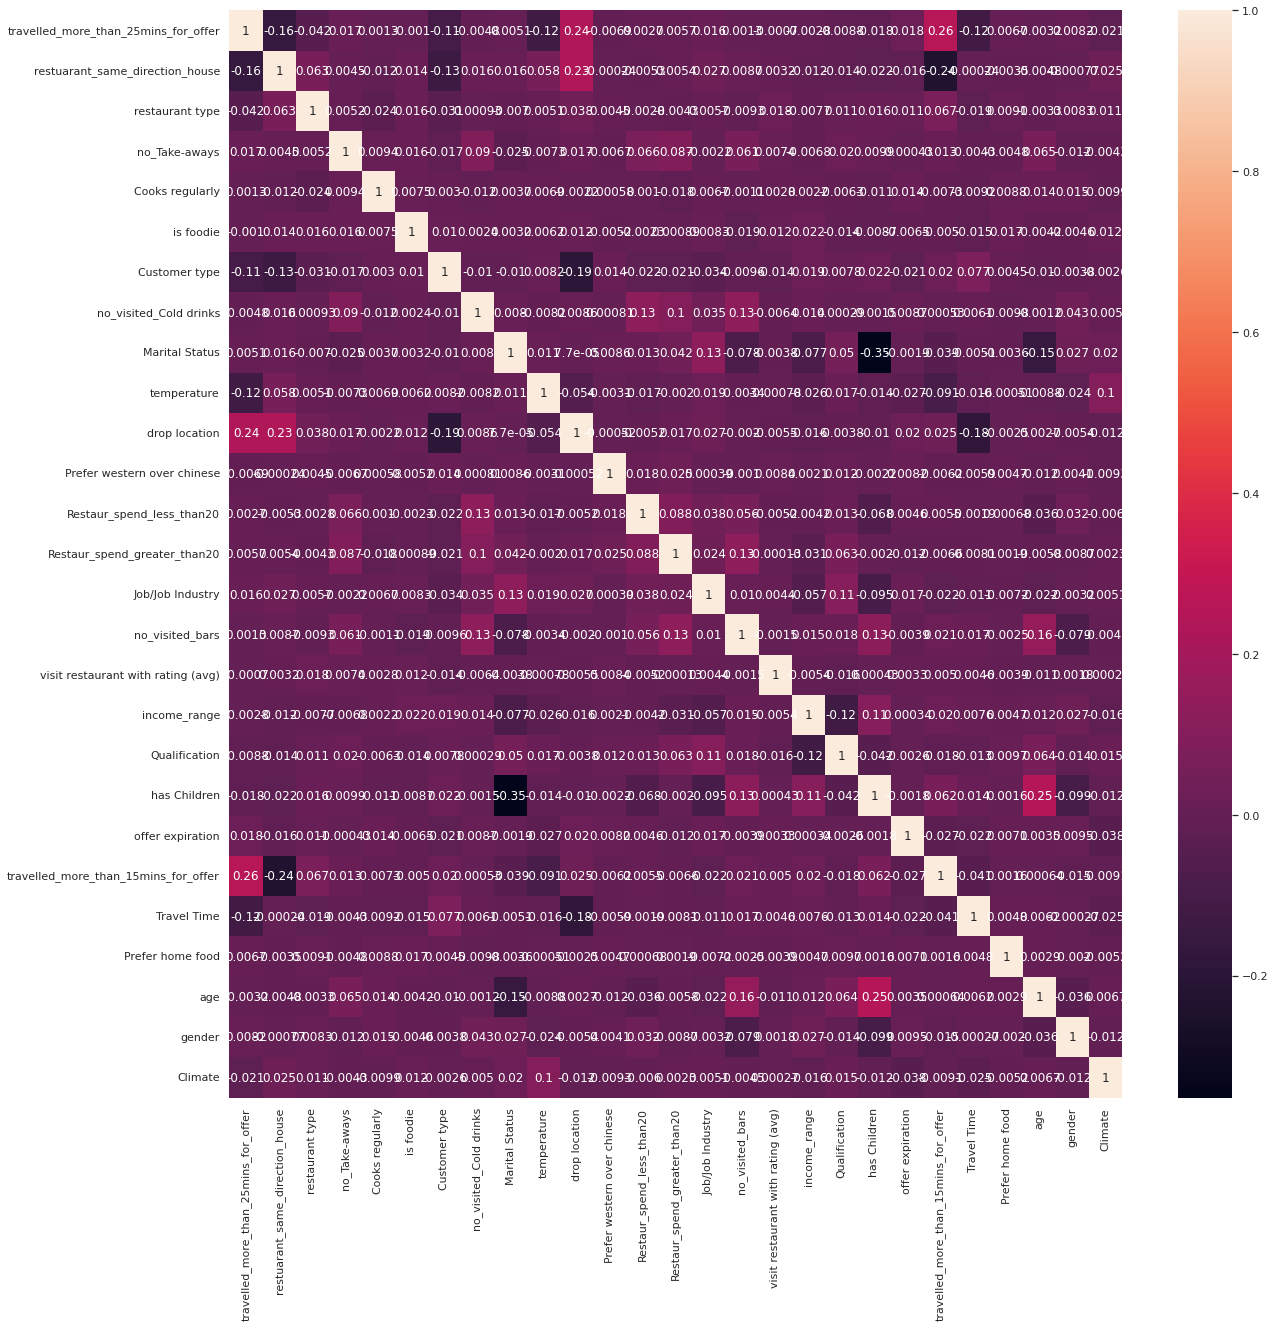

In [19]:
sns.heatmap(X_train_full.corr(),annot=True)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=1)

In [22]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
dummy_model.fit(X_train, y_train)
print(classification_report(y_test, dummy_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1364
           1       0.56      1.00      0.72      1731

    accuracy                           0.56      3095
   macro avg       0.28      0.50      0.36      3095
weighted avg       0.31      0.56      0.40      3095



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Submission


In [23]:
#fit model on whole data first !!!!!!!!!!!!!!!!!!!!!!!
dummy_model.fit(X_train_full, y_train_full)
dummy_model.fit(X_train_full, y_train_full)


preds = [int(i) for i in dummy_model.predict(X_true)]
submission = pd.DataFrame({"id": np.arange(0,len(preds)), "Offer Accepted": le.inverse_transform(preds)})
#submission.to_csv("submission.csv", index=False)

In [24]:
len(preds)

5305

In [25]:
submission.head()

,id,Offer Accepted
0,0,Yes
1,1,Yes
2,2,Yes
3,3,Yes
4,4,Yes
